In [4]:
import numpy as np

def k_means(data, k, max_iterations=100, print_complexity=False):
    """
    K-Means Clustering Algorithm

    Parameters:
    - data: numpy array of shape (m, n) representing m data points in an n-dimensional space
    - k: number of clusters
    - max_iterations: maximum number of iterations (default is 100)

    Returns:
    - centroids: Final centroids after clustering
    - clusters: List of clusters, where each cluster is a list of indices of data points belonging to that cluster
    """

    m, n = data.shape  # m: number of points, n: number of attributes
    centroids = data[np.random.choice(m, k, replace=False)]  # O(m * K)

    for iteration in range(max_iterations):  # O(I)
        # Step 1: Assign each data point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)  # O(m * K * n)
        assignments = np.argmin(distances, axis=1)  # O(m * K)

        # Step 2: Update centroids based on mean of assigned points
        new_centroids = np.array([data[assignments == j].mean(axis=0) for j in range(k)])  # O(m * K * n)

        # Check for convergence
        if np.all(centroids == new_centroids):  # O(K * n)
            break

        centroids = new_centroids

    # Calculating the time complexity in terms of Big O notation
    # Time Complexity: O(m * K * I * n)
    # - m: Number of points
    # - K: Number of clusters
    # - I: Number of iterations
    # - n: Number of attributes (dimensionality of the space)
    
    # Overall time complexity: O(m * K * I * n)
    if print_complexity:
        complexity = m * k * (iteration + 1) * n
        print("Time Complexity Analysis:")
        print(f"Number of Points (m): {m}")
        print(f"Number of Clusters (K): {k}")
        print(f"Number of Iterations (I): {iteration + 1}")
        print(f"Number of Attributes (n): {n}")
        print(f"Time Complexity (Big O): O(m * K * I * n) = {complexity}")

    # Return final centroids and clusters
    return centroids, [np.where(assignments == j)[0] for j in range(k)]  # O(m * K)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


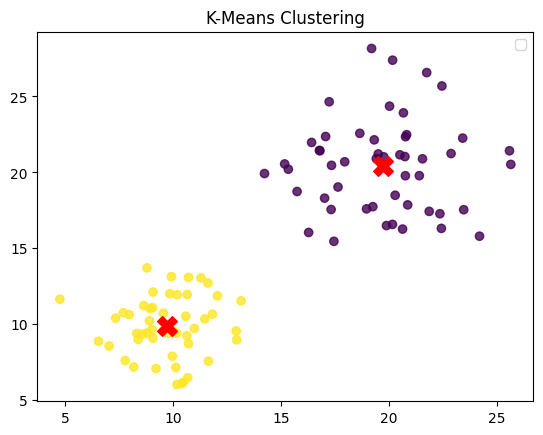

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the 'data' and 'centroids' from the K-Means algorithm
data = np.vstack([cluster1, cluster2])
centroids, clusters = k_means(data, k=2)  # Assuming you have the k_means function

# Get cluster assignments
distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
assignments = np.argmin(distances, axis=1)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=assignments, cmap='viridis', alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title('K-Means Clustering')
plt.legend()
plt.show()
